# Top Coder - Breast Cancer Prediction

**PROBLEM STATEMENT**

The provided dataset includes participant characteristics previously shown to be associated with breast cancer risk estimation including age, race/ethnicity, age at first birth, breast density, mammogram result, use of hormone replacement therapy, menopausal status, surgical menopause, body mass index, breast procedure, and diagnosis of invasive breast cancer.
These data can be used to describe the distribution of breast cancer risk in the general population or to explore relationships among breast cancer risk factors. 

**Objective**

- Predict Breast cancer result.
- The objective of the project is to leverage Topcoder member software development skills and Data Science skills in order to make progress in the field of Oncology.This progress can be in any sub-area, but it's mostly going to revolve around the sub-area of Cancer Prevention.

**Data Dictionary**

1. **id:** Identifier of the row.
2. **menopaus:** 0 = premenopausal; 1 = postmenopausal or age>=55 ; 9 = unknown.
3. **agegrp:** 1 = 35-39; 2 = 40-44; 3 = 45-49; 4 = 50-54; 5 = 55-59; 6 = 60-64; 7 = 65-69; 8 = 70-74; 9 = 75-79; 10 = 80-84.
4. **density:** BI-RADS breast density codes 1 = Almost entirely fat; 2 = Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Unknown or different measurement system.
5. **race:** 1 = white; 2 = Asian/Pacific Islander; 3 = black; 4 = Native American; 5 = other/mixed; 9 = unknown.
6. **Hispanic:** 0 = no; 1 = yes; 9 = unknown.
7. **bmi:** Body mass index: 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = unknown.
8. **agefirst:** Age at first birth: 0 = Age < 30; 1 = Age 30 or greater; 2 = Nulliparous; 9 = unknown
9. **nrelbc:** Number of first degree relatives with breast cancer: 0 = zero; 1= one; 2 = 2 or more; 9 = unknown.
10. **brstproc:** Previous breast procedure: 0 = no; 1 = yes; 9 = unknown.
11. **lastmamm:** Result of last mammogram before the index mammogram: 0 = negative; 1 = false positive; 9 = unknown.
12. **surgmeno:** Marital status of customer.
13. **hrt:** Current hormone therapy: 0 = no; 1 = yes; 9 = unknown or not menopausal (menopaus=0 or menopaus=9).
14. **invasive:** Diagnosis of invasive breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes.
15. **cancer:** Diagnosis of invasive or ductal carcinoma in situ breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes.
16. **count:** Frequency count of this combination of covariates and outcomes (all variables 1 to 14).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from platform import python_version
print(python_version())

3.9.12


**Read the data**

In [4]:
df=pd.read_csv('data-training.csv')
df_test = pd.read_csv('data-provisional.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196462 entries, 0 to 196461
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        196462 non-null  object
 1   menopaus  196462 non-null  int64 
 2   agegrp    196462 non-null  int64 
 3   density   196462 non-null  int64 
 4   race      196462 non-null  int64 
 5   Hispanic  196462 non-null  int64 
 6   bmi       196462 non-null  int64 
 7   agefirst  196462 non-null  int64 
 8   nrelbc    196462 non-null  int64 
 9   brstproc  196462 non-null  int64 
 10  lastmamm  196462 non-null  int64 
 11  surgmeno  196462 non-null  int64 
 12  hrt       196462 non-null  int64 
 13  invasive  196462 non-null  int64 
 14  cancer    196462 non-null  int64 
 15  count     196462 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 24.0+ MB


In [6]:
df.head()

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,RE-TRAIN-0000002,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,RE-TRAIN-0000003,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,RE-TRAIN-0000004,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,RE-TRAIN-0000005,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2


In [7]:
df_test.head()

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,count
0,RE-PROV-0000001,0,1,1,1,0,1,0,0,0,0,9,9,0,4
1,RE-PROV-0000002,0,1,1,1,0,2,0,1,0,9,9,9,0,1
2,RE-PROV-0000003,0,1,1,1,0,2,9,0,0,0,9,9,0,4
3,RE-PROV-0000004,0,1,1,1,0,2,9,1,0,0,9,9,0,2
4,RE-PROV-0000005,0,1,1,1,0,3,2,0,0,9,9,9,0,3


In [8]:
test_file_ids = df_test['id'] ## necessary step

In [9]:
df = df.drop("id" , axis=1)
df_test = df_test.drop("id" , axis=1)

In [10]:
df.shape

(196462, 15)

In [11]:
df_test.shape

(28066, 14)

**Target variable distribution**

In [12]:
print(df.cancer.value_counts())
df.cancer.value_counts(normalize=True) 

0    189942
1      6520
Name: cancer, dtype: int64


0    0.966813
1    0.033187
Name: cancer, dtype: float64

**Get the info**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196462 entries, 0 to 196461
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   menopaus  196462 non-null  int64
 1   agegrp    196462 non-null  int64
 2   density   196462 non-null  int64
 3   race      196462 non-null  int64
 4   Hispanic  196462 non-null  int64
 5   bmi       196462 non-null  int64
 6   agefirst  196462 non-null  int64
 7   nrelbc    196462 non-null  int64
 8   brstproc  196462 non-null  int64
 9   lastmamm  196462 non-null  int64
 10  surgmeno  196462 non-null  int64
 11  hrt       196462 non-null  int64
 12  invasive  196462 non-null  int64
 13  cancer    196462 non-null  int64
 14  count     196462 non-null  int64
dtypes: int64(15)
memory usage: 22.5 MB


**Get the Summary Statistics**

In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
menopaus,196462.0,1.308752,1.908668,0.0,1.0,1.0,1.0,9.0
agegrp,196462.0,5.469674,2.387198,1.0,4.0,5.0,7.0,10.0
density,196462.0,4.093718,2.958682,1.0,2.0,3.0,9.0,9.0
race,196462.0,3.171438,3.145186,1.0,1.0,1.0,4.0,9.0
Hispanic,196462.0,2.887917,4.062008,0.0,0.0,0.0,9.0,9.0
bmi,196462.0,4.775483,3.469497,1.0,2.0,3.0,9.0,9.0
agefirst,196462.0,3.372927,3.973707,0.0,0.0,1.0,9.0,9.0
nrelbc,196462.0,1.571271,3.057983,0.0,0.0,0.0,1.0,9.0
brstproc,196462.0,1.450362,2.940595,0.0,0.0,0.0,1.0,9.0
lastmamm,196462.0,3.042176,4.198951,0.0,0.0,0.0,9.0,9.0


**Check for Object Data Type**

In [15]:
df.select_dtypes(include='object').head()

""
0
1
2
3
4


**Check for the different values under 'object' data type**

In [16]:
df.menopaus.value_counts()

1    157733
0     27686
9     11043
Name: menopaus, dtype: int64

In [17]:
df.agegrp.value_counts()

4     32743
3     27677
5     26287
6     23083
7     21253
8     19599
9     16337
2     13339
10    10581
1      5563
Name: agegrp, dtype: int64

In [18]:
df.density.value_counts()

2    56602
9    49730
3    49627
1    22469
4    18034
Name: density, dtype: int64

In [19]:
df.race.value_counts()

1    108735
9     40451
2     16186
3     15065
5      8606
4      7419
Name: race, dtype: int64

In [20]:
df.Hispanic.value_counts()

0    108288
9     59899
1     28275
Name: Hispanic, dtype: int64

In [21]:
df.bmi.value_counts()

9    76505
1    44426
2    36838
3    23218
4    15475
Name: bmi, dtype: int64

In [22]:
df.agefirst.value_counts()

0    77408
9    64061
2    31110
1    23883
Name: agefirst, dtype: int64

In [23]:
df.nrelbc.value_counts()

0    116512
1     45707
9     27786
2      6457
Name: nrelbc, dtype: int64

In [24]:
df.brstproc.value_counts()

0    114537
1     56548
9     25377
Name: brstproc, dtype: int64

In [25]:
df.lastmamm.value_counts()

0    119278
9     65061
1     12123
Name: lastmamm, dtype: int64

In [26]:
df.surgmeno.value_counts()

9    84860
0    66252
1    45350
Name: surgmeno, dtype: int64

In [27]:
df.hrt.value_counts()

0    70771
9    65734
1    59957
Name: hrt, dtype: int64

In [28]:
df.invasive.value_counts()

0    191431
1      5031
Name: invasive, dtype: int64

In [29]:
df.cancer.value_counts()

0    189942
1      6520
Name: cancer, dtype: int64

In [30]:
#df.count.value_counts()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196462 entries, 0 to 196461
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   menopaus  196462 non-null  int64
 1   agegrp    196462 non-null  int64
 2   density   196462 non-null  int64
 3   race      196462 non-null  int64
 4   Hispanic  196462 non-null  int64
 5   bmi       196462 non-null  int64
 6   agefirst  196462 non-null  int64
 7   nrelbc    196462 non-null  int64
 8   brstproc  196462 non-null  int64
 9   lastmamm  196462 non-null  int64
 10  surgmeno  196462 non-null  int64
 11  hrt       196462 non-null  int64
 12  invasive  196462 non-null  int64
 13  cancer    196462 non-null  int64
 14  count     196462 non-null  int64
dtypes: int64(15)
memory usage: 22.5 MB


**Check for Null Values**

In [32]:
df.isnull().sum()

menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
count       0
dtype: int64

In [33]:
df_test.isnull().sum()

menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
count       0
dtype: int64

**Check for Outliers**

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


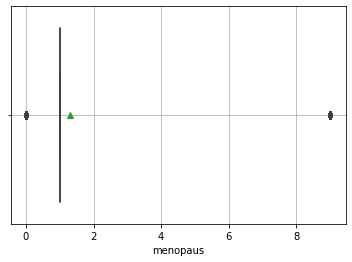

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


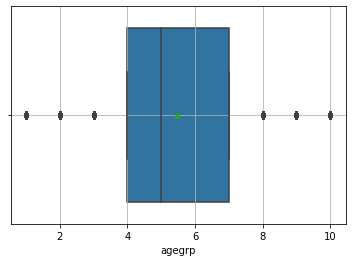

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


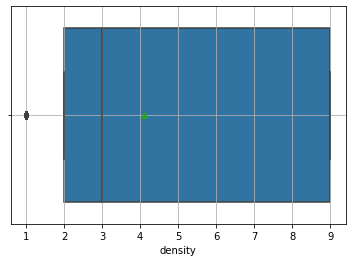

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


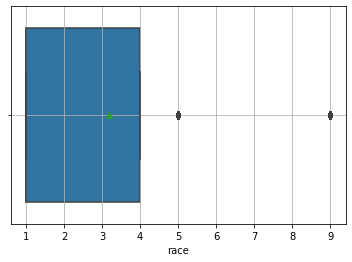

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


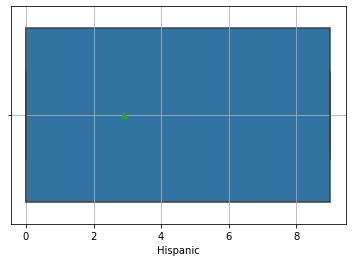

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


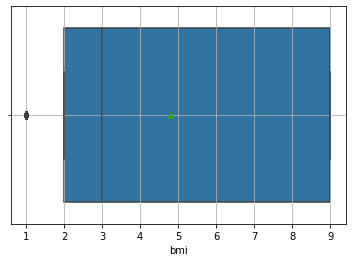

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


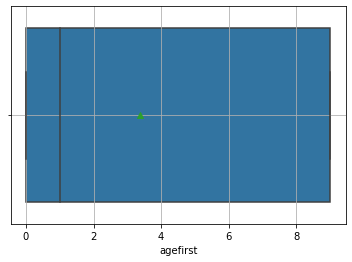

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


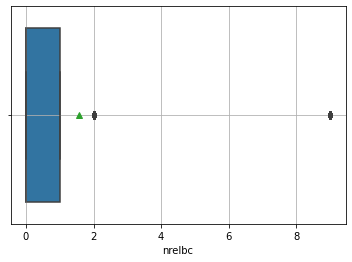

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


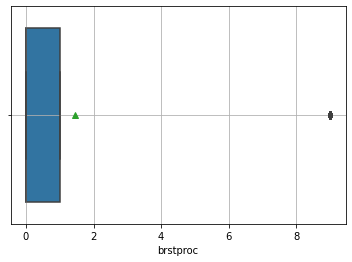

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


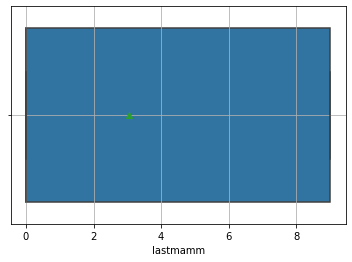

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


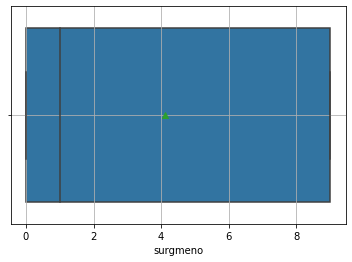

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


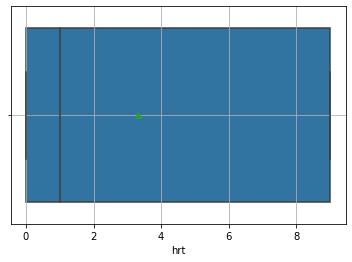

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


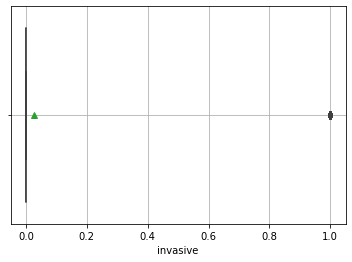

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


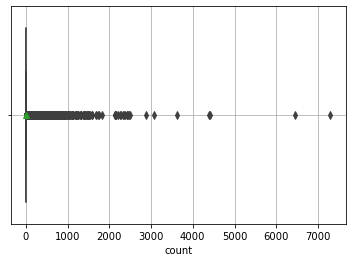

In [31]:
cols=['menopaus','agegrp','density','race','Hispanic','bmi','agefirst','nrelbc','brstproc','lastmamm','surgmeno','hrt','invasive','count']
for i in cols:
    sns.boxplot(df[i],showmeans=True,whis=0.1)
    plt.grid()
    plt.show();

**Outlier Treatment**

In [32]:
#def remove_outlier(col):
#    Q1,Q3=col.quantile([0.25,0.75])
#    IQR=Q3-Q1
#    lower_range= Q1-(1.5 * IQR)
#    upper_range= Q3+(1.5 * IQR)
#    return lower_range, upper_range 

In [33]:
#for column in df[cols].columns:
#    lr,ur=remove_outlier(df[column])
#    df[column]=np.where(df[column]>ur,ur,df[column])
#    df[column]=np.where(df[column]<lr,lr,df[column])

In [34]:
#cols=['AgentBonus', 'Age', 'CustTenure', 'MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls']
#for i in cols:
#    sns.boxplot(df[i],whis=1.5)
#    plt.grid()
#    plt.show();

**Univariate Analysis**

- Distribution of variables

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,20

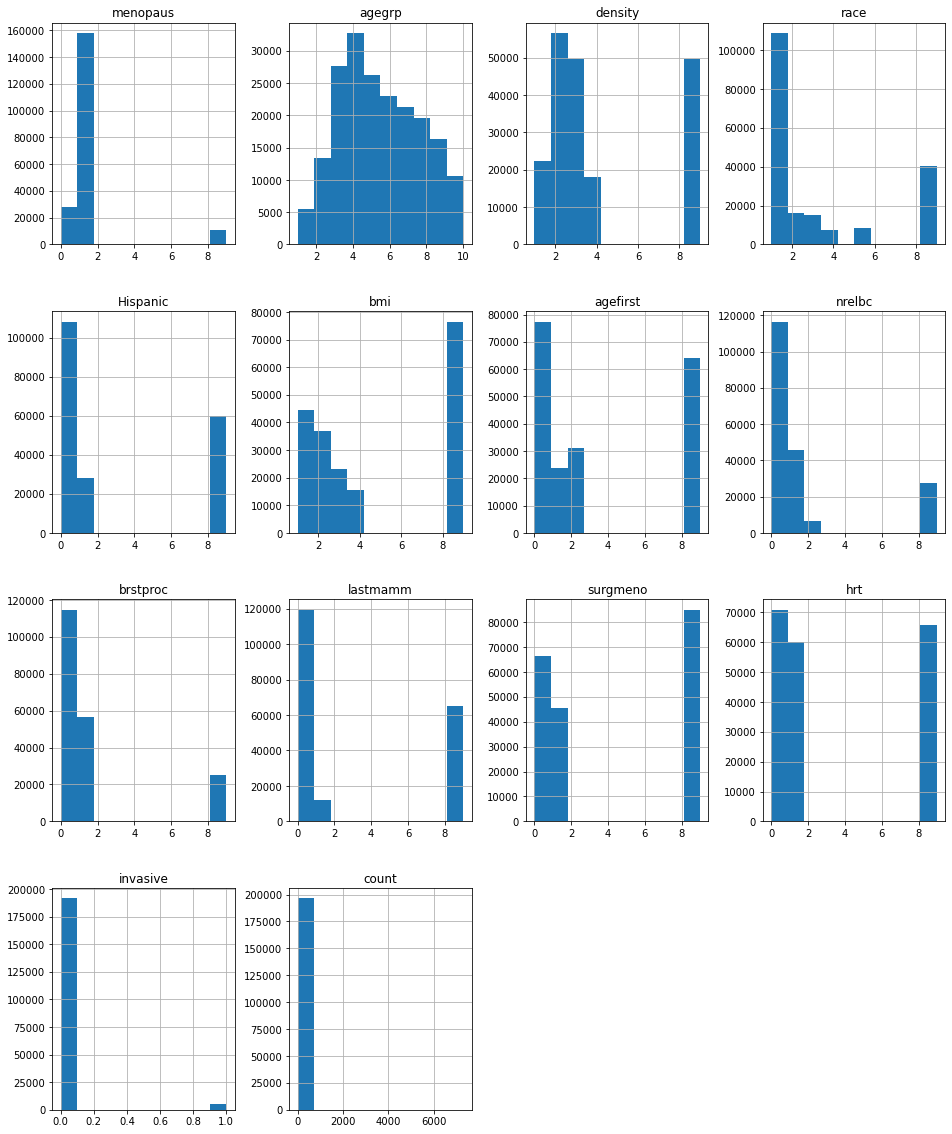

In [36]:
df[['menopaus','agegrp','density','race','Hispanic','bmi','agefirst','nrelbc','brstproc','lastmamm','surgmeno','hrt','invasive','count']].hist();

**BiVariate Analysis with Target Variable : 'cancer'**

- 'menopaus' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

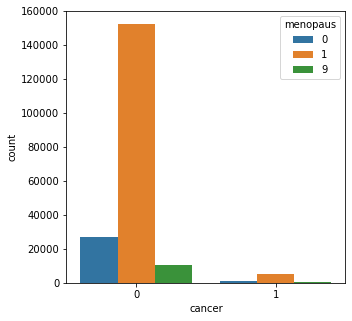

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="menopaus",data=df)

- 'agegrp' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

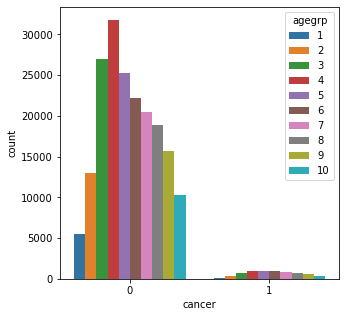

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="agegrp",data=df)

- 'density' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

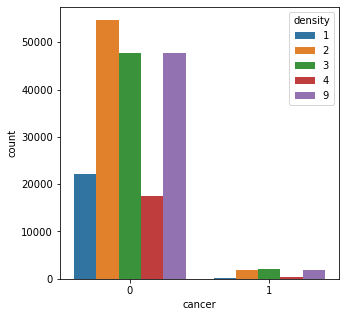

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="density",data=df)

- 'race' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

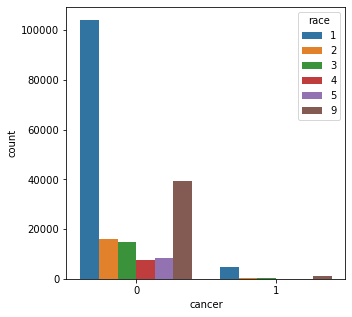

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="race",data=df)

- 'Hispanic' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

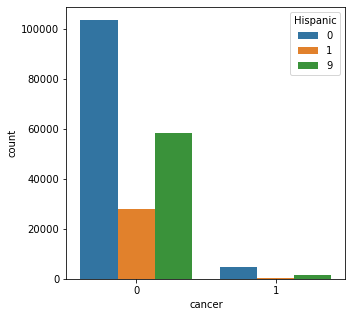

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="Hispanic",data=df)

- 'bmi' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

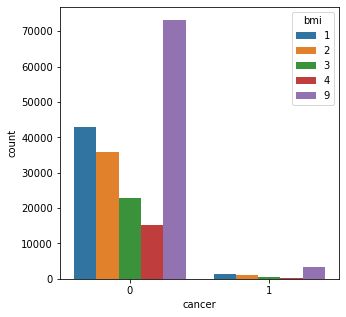

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="bmi",data=df)

- 'agefirst' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

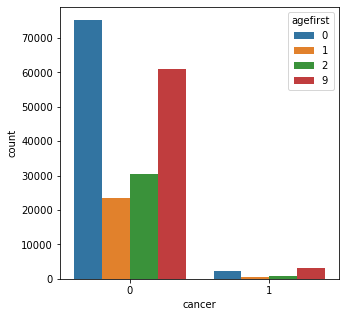

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="agefirst",data=df)

- 'nrelbc' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

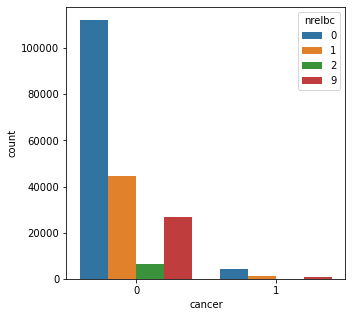

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="nrelbc",data=df)

- 'brstproc' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

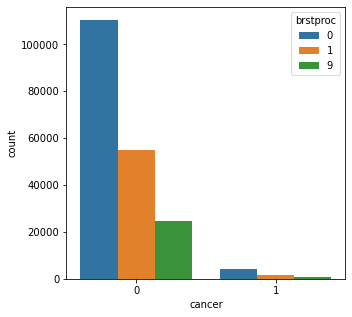

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="brstproc",data=df)

- 'lastmamm' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

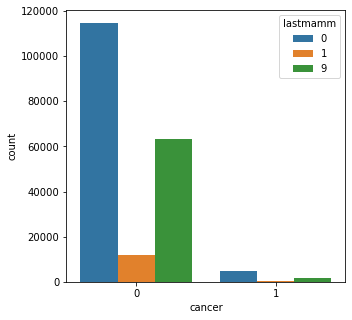

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="lastmamm",data=df)

- 'surgmeno' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

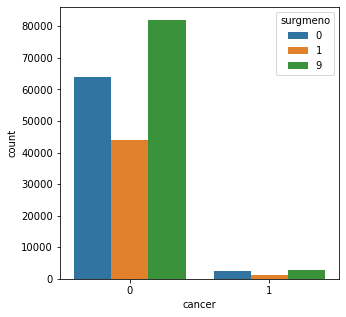

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="surgmeno",data=df)

- 'hrt' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

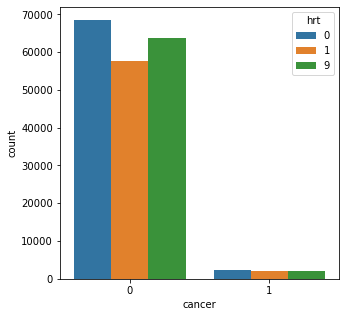

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="hrt",data=df)

- 'invasive' with 'cancer'

<AxesSubplot:xlabel='cancer', ylabel='count'>

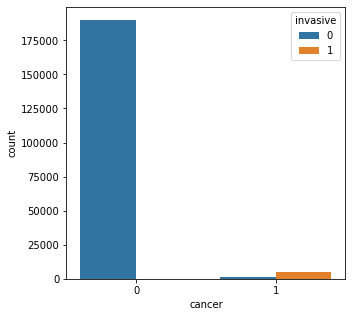

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x="cancer",hue="invasive",data=df)

- 'count' with 'cancer'

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


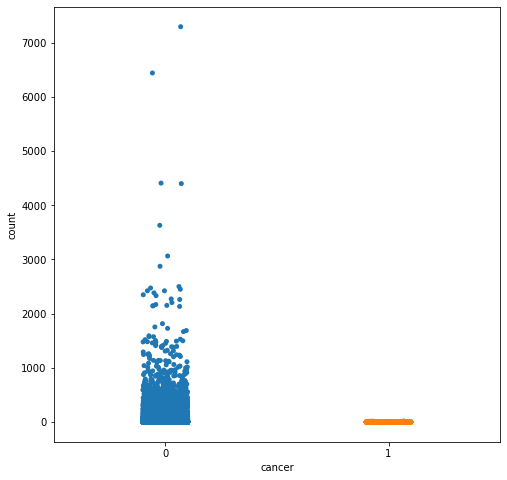

In [50]:
plt.figure(figsize=(8,8))
sns.stripplot(df["cancer"], df['count'], jitter=True) 
plt.show()

**Multi variate Analysis**

In [ ]:
#sns.pairplot(df,diag_kind='hist',hue='cancer');

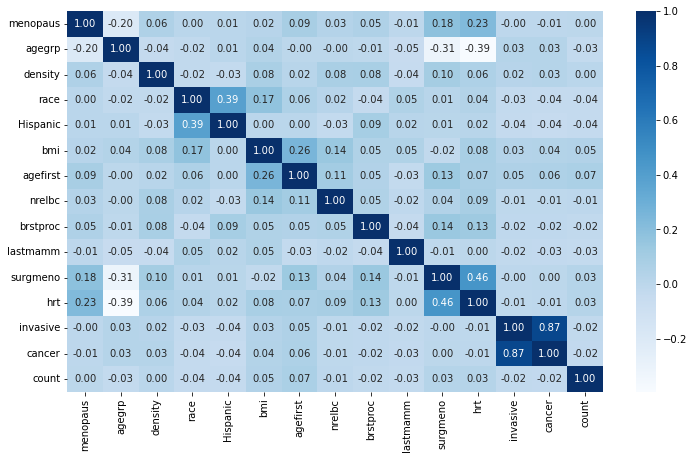

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

**Observation**

- The target field 'cancer'is highly influenced by 'invasive' field.
- There is no corelation among the predictor fields.

**Insights from EDA**

**VIF**

In [53]:
df.columns

Index(['menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi', 'agefirst',
       'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive',
       'cancer', 'count'],
      dtype='object')

In [36]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,-0.68569,-1.872356,-1.045643,-0.690402,-0.71096,-1.088196,-0.848813,-0.513827,-0.493222,1.418888,1.14248,1.40311,-0.162114,-0.185273,-0.119094
1,-0.68569,-1.872356,-1.045643,-0.690402,-0.71096,-1.088196,-0.848813,-0.513827,-0.493222,1.418888,1.14248,1.40311,-0.162114,-0.185273,-0.082307
2,-0.68569,-1.872356,-1.045643,-0.690402,-0.71096,-1.088196,-0.848813,-0.186813,-0.493222,-0.724511,1.14248,1.40311,-0.162114,-0.185273,-0.137487
3,-0.68569,-1.872356,-1.045643,-0.690402,-0.71096,-1.088196,-0.848813,-0.186813,-0.493222,1.418888,1.14248,1.40311,-0.162114,-0.185273,-0.137487
4,-0.68569,-1.872356,-1.045643,-0.690402,-0.71096,-1.088196,-0.597159,-0.513827,-0.493222,-0.724511,1.14248,1.40311,-0.162114,-0.185273,-0.119094


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Z = df_scaled
Z = df_scaled.drop(['cancer'],axis=1) 
vif = pd.DataFrame()
vif["features"]=Z.columns
vif["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]  
print(vif.sort_values(by='VIF'))

    features       VIF
12  invasive  1.008640
13     count  1.013124
9   lastmamm  1.014482
2    density  1.030656
7     nrelbc  1.039857
8   brstproc  1.057166
0   menopaus  1.083250
6   agefirst  1.115200
5        bmi  1.154057
4   Hispanic  1.201960
3       race  1.235072
1     agegrp  1.248989
10  surgmeno  1.353580
11       hrt  1.442357


**Train/Test Split**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# capture the target column ("cancer") into separate vectors for training set and test set

# Copy all the predictor variables into X dataframe
X = df.drop(['cancer'],axis=1) 
# Copy target into the y dataframe. 
y = df[['cancer']]

In [40]:
# splitting data into training and test set for independent attributes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['cancer']) 

In [41]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((137523, 14), (137523, 1), (58939, 14), (58939, 1))

In [42]:
y_test.value_counts(normalize=True)

cancer
0         0.966813
1         0.033187
dtype: float64

In [43]:
y_train.value_counts(normalize=True)

cancer
0         0.966813
1         0.033187
dtype: float64

**Scaling**

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Import necessary libraries for Model Building**

In [46]:
from sklearn.ensemble import RandomForestClassifier
import catboost as catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgboost

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

**RandomForest, XGB, CatBoost**

In [104]:
rf= RandomForestClassifier()
xgb = XGBClassifier() 
cb = CatBoostClassifier()

In [105]:
models=[rf,xgb,cb]
scores_train=[]
scores_test=[]

In [106]:
for i in models:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))

C:\Users\User\AppData\Local\Temp\ipykernel_4628\1020830230.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


Learning rate set to 0.084337
0:	learn: 0.5097666	total: 371ms	remaining: 6m 10s
1:	learn: 0.3747878	total: 490ms	remaining: 4m 4s
2:	learn: 0.2811275	total: 601ms	remaining: 3m 19s
3:	learn: 0.2143181	total: 777ms	remaining: 3m 13s
4:	learn: 0.1682652	total: 909ms	remaining: 3m
5:	learn: 0.1355917	total: 1s	remaining: 2m 46s
6:	learn: 0.1125443	total: 1.1s	remaining: 2m 35s
7:	learn: 0.0957205	total: 1.2s	remaining: 2m 28s
8:	learn: 0.0830059	total: 1.29s	remaining: 2m 22s
9:	learn: 0.0737386	total: 1.39s	remaining: 2m 17s
10:	learn: 0.0645405	total: 1.47s	remaining: 2m 12s
11:	learn: 0.0594856	total: 1.56s	remaining: 2m 8s
12:	learn: 0.0555626	total: 1.65s	remaining: 2m 5s
13:	learn: 0.0527131	total: 1.76s	remaining: 2m 4s
14:	learn: 0.0485746	total: 1.88s	remaining: 2m 3s
15:	learn: 0.0470067	total: 2s	remaining: 2m 3s
16:	learn: 0.0456883	total: 2.12s	remaining: 2m 2s
17:	learn: 0.0435210	total: 2.23s	remaining: 2m 1s
18:	learn: 0.0418040	total: 2.33s	remaining: 2m
19:	learn: 0.040

158:	learn: 0.0228545	total: 28.3s	remaining: 2m 29s
159:	learn: 0.0228141	total: 28.5s	remaining: 2m 29s
160:	learn: 0.0227792	total: 28.7s	remaining: 2m 29s
161:	learn: 0.0227271	total: 28.8s	remaining: 2m 28s
162:	learn: 0.0226870	total: 28.9s	remaining: 2m 28s
163:	learn: 0.0226504	total: 29.1s	remaining: 2m 28s
164:	learn: 0.0226159	total: 29.3s	remaining: 2m 28s
165:	learn: 0.0225760	total: 29.4s	remaining: 2m 27s
166:	learn: 0.0225284	total: 29.5s	remaining: 2m 27s
167:	learn: 0.0224787	total: 29.7s	remaining: 2m 26s
168:	learn: 0.0224174	total: 29.8s	remaining: 2m 26s
169:	learn: 0.0223526	total: 30s	remaining: 2m 26s
170:	learn: 0.0222981	total: 30.2s	remaining: 2m 26s
171:	learn: 0.0222673	total: 30.4s	remaining: 2m 26s
172:	learn: 0.0222291	total: 30.5s	remaining: 2m 26s
173:	learn: 0.0221876	total: 30.7s	remaining: 2m 25s
174:	learn: 0.0221256	total: 30.8s	remaining: 2m 25s
175:	learn: 0.0220822	total: 30.9s	remaining: 2m 24s
176:	learn: 0.0220450	total: 31s	remaining: 2m 2

315:	learn: 0.0177469	total: 53s	remaining: 1m 54s
316:	learn: 0.0177330	total: 53.2s	remaining: 1m 54s
317:	learn: 0.0177048	total: 53.3s	remaining: 1m 54s
318:	learn: 0.0176705	total: 53.4s	remaining: 1m 54s
319:	learn: 0.0176452	total: 53.7s	remaining: 1m 54s
320:	learn: 0.0176240	total: 53.8s	remaining: 1m 53s
321:	learn: 0.0176083	total: 54s	remaining: 1m 53s
322:	learn: 0.0175944	total: 54.1s	remaining: 1m 53s
323:	learn: 0.0175717	total: 54.3s	remaining: 1m 53s
324:	learn: 0.0175497	total: 54.5s	remaining: 1m 53s
325:	learn: 0.0175337	total: 54.7s	remaining: 1m 53s
326:	learn: 0.0175136	total: 55s	remaining: 1m 53s
327:	learn: 0.0174872	total: 55.3s	remaining: 1m 53s
328:	learn: 0.0174586	total: 55.6s	remaining: 1m 53s
329:	learn: 0.0174365	total: 55.9s	remaining: 1m 53s
330:	learn: 0.0174196	total: 56.1s	remaining: 1m 53s
331:	learn: 0.0173968	total: 56.3s	remaining: 1m 53s
332:	learn: 0.0173599	total: 56.4s	remaining: 1m 53s
333:	learn: 0.0173459	total: 56.6s	remaining: 1m 52s

471:	learn: 0.0148805	total: 1m 22s	remaining: 1m 32s
472:	learn: 0.0148703	total: 1m 23s	remaining: 1m 32s
473:	learn: 0.0148506	total: 1m 23s	remaining: 1m 32s
474:	learn: 0.0148405	total: 1m 23s	remaining: 1m 32s
475:	learn: 0.0148283	total: 1m 23s	remaining: 1m 31s
476:	learn: 0.0148171	total: 1m 23s	remaining: 1m 31s
477:	learn: 0.0147932	total: 1m 23s	remaining: 1m 31s
478:	learn: 0.0147797	total: 1m 23s	remaining: 1m 31s
479:	learn: 0.0147691	total: 1m 24s	remaining: 1m 31s
480:	learn: 0.0147512	total: 1m 24s	remaining: 1m 31s
481:	learn: 0.0147361	total: 1m 24s	remaining: 1m 30s
482:	learn: 0.0147200	total: 1m 25s	remaining: 1m 30s
483:	learn: 0.0147020	total: 1m 25s	remaining: 1m 30s
484:	learn: 0.0146820	total: 1m 25s	remaining: 1m 30s
485:	learn: 0.0146700	total: 1m 25s	remaining: 1m 30s
486:	learn: 0.0146614	total: 1m 26s	remaining: 1m 30s
487:	learn: 0.0146400	total: 1m 26s	remaining: 1m 30s
488:	learn: 0.0146224	total: 1m 26s	remaining: 1m 30s
489:	learn: 0.0146055	total:

624:	learn: 0.0128937	total: 2m 2s	remaining: 1m 13s
625:	learn: 0.0128824	total: 2m 2s	remaining: 1m 13s
626:	learn: 0.0128751	total: 2m 3s	remaining: 1m 13s
627:	learn: 0.0128709	total: 2m 3s	remaining: 1m 13s
628:	learn: 0.0128533	total: 2m 3s	remaining: 1m 12s
629:	learn: 0.0128417	total: 2m 3s	remaining: 1m 12s
630:	learn: 0.0128254	total: 2m 4s	remaining: 1m 12s
631:	learn: 0.0128175	total: 2m 4s	remaining: 1m 12s
632:	learn: 0.0128067	total: 2m 5s	remaining: 1m 12s
633:	learn: 0.0127999	total: 2m 5s	remaining: 1m 12s
634:	learn: 0.0127844	total: 2m 5s	remaining: 1m 12s
635:	learn: 0.0127653	total: 2m 5s	remaining: 1m 11s
636:	learn: 0.0127559	total: 2m 5s	remaining: 1m 11s
637:	learn: 0.0127431	total: 2m 5s	remaining: 1m 11s
638:	learn: 0.0127282	total: 2m 5s	remaining: 1m 11s
639:	learn: 0.0127156	total: 2m 6s	remaining: 1m 10s
640:	learn: 0.0126968	total: 2m 6s	remaining: 1m 10s
641:	learn: 0.0126889	total: 2m 6s	remaining: 1m 10s
642:	learn: 0.0126781	total: 2m 6s	remaining: 

780:	learn: 0.0113384	total: 2m 27s	remaining: 41.4s
781:	learn: 0.0113260	total: 2m 27s	remaining: 41.2s
782:	learn: 0.0113110	total: 2m 27s	remaining: 41s
783:	learn: 0.0113061	total: 2m 27s	remaining: 40.8s
784:	learn: 0.0112992	total: 2m 28s	remaining: 40.6s
785:	learn: 0.0112888	total: 2m 28s	remaining: 40.4s
786:	learn: 0.0112778	total: 2m 28s	remaining: 40.2s
787:	learn: 0.0112724	total: 2m 28s	remaining: 40s
788:	learn: 0.0112651	total: 2m 28s	remaining: 39.8s
789:	learn: 0.0112522	total: 2m 29s	remaining: 39.6s
790:	learn: 0.0112461	total: 2m 29s	remaining: 39.4s
791:	learn: 0.0112411	total: 2m 29s	remaining: 39.2s
792:	learn: 0.0112328	total: 2m 29s	remaining: 39s
793:	learn: 0.0112212	total: 2m 29s	remaining: 38.8s
794:	learn: 0.0112188	total: 2m 29s	remaining: 38.6s
795:	learn: 0.0112107	total: 2m 29s	remaining: 38.4s
796:	learn: 0.0112052	total: 2m 29s	remaining: 38.2s
797:	learn: 0.0111923	total: 2m 30s	remaining: 38s
798:	learn: 0.0111767	total: 2m 30s	remaining: 37.8s
7

936:	learn: 0.0101859	total: 2m 51s	remaining: 11.5s
937:	learn: 0.0101762	total: 2m 51s	remaining: 11.3s
938:	learn: 0.0101744	total: 2m 51s	remaining: 11.2s
939:	learn: 0.0101642	total: 2m 51s	remaining: 11s
940:	learn: 0.0101572	total: 2m 52s	remaining: 10.8s
941:	learn: 0.0101432	total: 2m 52s	remaining: 10.6s
942:	learn: 0.0101348	total: 2m 52s	remaining: 10.4s
943:	learn: 0.0101312	total: 2m 52s	remaining: 10.2s
944:	learn: 0.0101201	total: 2m 52s	remaining: 10.1s
945:	learn: 0.0101166	total: 2m 52s	remaining: 9.87s
946:	learn: 0.0101109	total: 2m 52s	remaining: 9.68s
947:	learn: 0.0101064	total: 2m 53s	remaining: 9.5s
948:	learn: 0.0100984	total: 2m 53s	remaining: 9.31s
949:	learn: 0.0100925	total: 2m 53s	remaining: 9.13s
950:	learn: 0.0100851	total: 2m 53s	remaining: 8.95s
951:	learn: 0.0100822	total: 2m 53s	remaining: 8.76s
952:	learn: 0.0100776	total: 2m 53s	remaining: 8.57s
953:	learn: 0.0100670	total: 2m 53s	remaining: 8.39s
954:	learn: 0.0100610	total: 2m 54s	remaining: 8.

In [107]:
print(pd.DataFrame({'Training Accuracy':scores_train,'Test Accuracy': scores_test},          
                   index=['Random Forest','XGBoost','CatBoost'])) 

               Training Accuracy  Test Accuracy
Random Forest           0.999636       0.993247
XGBoost                 0.995993       0.995164
CatBoost                0.997128       0.995419


**Hyper Parameter Tuning**

In [54]:
cb = CatBoostClassifier()

In [55]:
parameters = {'depth' : [ 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.04 , 0.05 , 0.06 , 0.07,0.08],
    'iterations': [100,200,300,400,500,600,700,800,900,1000,1100,1200] 
}

In [56]:
Grid_CBC = GridSearchCV(estimator = cb, param_grid = parameters, cv = 2,n_jobs=-1)

In [ ]:
Grid_CBC.fit(x_train,y_train)

In [ ]:
print("\n The best estimator across all searched params:",Grid_CBC.best_estimator_)

In [ ]:
print("\n The best score across all searched params:",Grid_CBC.best_score_)

In [ ]:
print("\n The best parameter across all searched params:",Grid_CBC.best_params_)

In [ ]:
cb.score(x_train, y_train)

In [ ]:
cb.score(x_test, y_test)

In [49]:
#Shinkansen
cb = CatBoostClassifier(iterations=1200, depth = 10,learning_rate=0.06)
#Train:94379/Test:35602

In [51]:
cb.fit(x_train,y_train)
scores_train.append(cb.score(x_train, y_train))
scores_test.append(cb.score(x_test, y_test))

0:	learn: 0.5582000	total: 600ms	remaining: 11m 59s
1:	learn: 0.4478694	total: 734ms	remaining: 7m 19s
2:	learn: 0.3629266	total: 833ms	remaining: 5m 32s
3:	learn: 0.2974104	total: 922ms	remaining: 4m 35s
4:	learn: 0.2452435	total: 1.11s	remaining: 4m 25s
5:	learn: 0.2051404	total: 1.22s	remaining: 4m 2s
6:	learn: 0.1722599	total: 1.33s	remaining: 3m 46s
7:	learn: 0.1466927	total: 1.57s	remaining: 3m 53s
8:	learn: 0.1263717	total: 1.75s	remaining: 3m 52s
9:	learn: 0.1107794	total: 1.98s	remaining: 3m 55s
10:	learn: 0.0980550	total: 2.12s	remaining: 3m 48s
11:	learn: 0.0863539	total: 2.34s	remaining: 3m 52s
12:	learn: 0.0789372	total: 2.42s	remaining: 3m 40s
13:	learn: 0.0709044	total: 2.67s	remaining: 3m 46s
14:	learn: 0.0642029	total: 2.96s	remaining: 3m 53s
15:	learn: 0.0603276	total: 3.06s	remaining: 3m 46s
16:	learn: 0.0559775	total: 3.17s	remaining: 3m 40s
17:	learn: 0.0523183	total: 3.42s	remaining: 3m 44s
18:	learn: 0.0504179	total: 3.51s	remaining: 3m 38s
19:	learn: 0.0479098	t

158:	learn: 0.0169547	total: 45s	remaining: 4m 54s
159:	learn: 0.0168707	total: 45.3s	remaining: 4m 54s
160:	learn: 0.0167994	total: 45.6s	remaining: 4m 54s
161:	learn: 0.0167529	total: 45.8s	remaining: 4m 53s
162:	learn: 0.0167042	total: 46.1s	remaining: 4m 53s
163:	learn: 0.0166288	total: 46.4s	remaining: 4m 53s
164:	learn: 0.0165494	total: 46.7s	remaining: 4m 52s
165:	learn: 0.0164875	total: 46.9s	remaining: 4m 52s
166:	learn: 0.0164370	total: 47.2s	remaining: 4m 51s
167:	learn: 0.0163909	total: 47.4s	remaining: 4m 51s
168:	learn: 0.0163147	total: 47.7s	remaining: 4m 50s
169:	learn: 0.0162724	total: 48s	remaining: 4m 50s
170:	learn: 0.0162096	total: 48.2s	remaining: 4m 50s
171:	learn: 0.0161537	total: 48.5s	remaining: 4m 49s
172:	learn: 0.0160840	total: 48.8s	remaining: 4m 49s
173:	learn: 0.0160657	total: 48.9s	remaining: 4m 48s
174:	learn: 0.0160012	total: 49.2s	remaining: 4m 47s
175:	learn: 0.0159373	total: 49.4s	remaining: 4m 47s
176:	learn: 0.0158748	total: 49.7s	remaining: 4m 4

313:	learn: 0.0107970	total: 1m 24s	remaining: 3m 59s
314:	learn: 0.0107508	total: 1m 25s	remaining: 3m 59s
315:	learn: 0.0107293	total: 1m 25s	remaining: 3m 58s
316:	learn: 0.0107151	total: 1m 25s	remaining: 3m 58s
317:	learn: 0.0106945	total: 1m 25s	remaining: 3m 58s
318:	learn: 0.0106835	total: 1m 26s	remaining: 3m 57s
319:	learn: 0.0106335	total: 1m 26s	remaining: 3m 57s
320:	learn: 0.0105968	total: 1m 26s	remaining: 3m 56s
321:	learn: 0.0105726	total: 1m 26s	remaining: 3m 56s
322:	learn: 0.0105506	total: 1m 27s	remaining: 3m 56s
323:	learn: 0.0105221	total: 1m 27s	remaining: 3m 56s
324:	learn: 0.0104573	total: 1m 27s	remaining: 3m 55s
325:	learn: 0.0104264	total: 1m 27s	remaining: 3m 55s
326:	learn: 0.0104101	total: 1m 28s	remaining: 3m 55s
327:	learn: 0.0103835	total: 1m 28s	remaining: 3m 55s
328:	learn: 0.0103602	total: 1m 28s	remaining: 3m 54s
329:	learn: 0.0103448	total: 1m 28s	remaining: 3m 54s
330:	learn: 0.0103237	total: 1m 29s	remaining: 3m 54s
331:	learn: 0.0103075	total:

466:	learn: 0.0074530	total: 2m 3s	remaining: 3m 13s
467:	learn: 0.0074143	total: 2m 3s	remaining: 3m 13s
468:	learn: 0.0073860	total: 2m 4s	remaining: 3m 13s
469:	learn: 0.0073744	total: 2m 4s	remaining: 3m 13s
470:	learn: 0.0073653	total: 2m 4s	remaining: 3m 12s
471:	learn: 0.0073472	total: 2m 4s	remaining: 3m 12s
472:	learn: 0.0073373	total: 2m 5s	remaining: 3m 12s
473:	learn: 0.0073126	total: 2m 5s	remaining: 3m 12s
474:	learn: 0.0073037	total: 2m 5s	remaining: 3m 11s
475:	learn: 0.0072790	total: 2m 5s	remaining: 3m 11s
476:	learn: 0.0072689	total: 2m 6s	remaining: 3m 11s
477:	learn: 0.0072562	total: 2m 6s	remaining: 3m 11s
478:	learn: 0.0072375	total: 2m 6s	remaining: 3m 10s
479:	learn: 0.0072276	total: 2m 7s	remaining: 3m 10s
480:	learn: 0.0072166	total: 2m 7s	remaining: 3m 10s
481:	learn: 0.0071976	total: 2m 7s	remaining: 3m 9s
482:	learn: 0.0071834	total: 2m 7s	remaining: 3m 9s
483:	learn: 0.0071715	total: 2m 8s	remaining: 3m 9s
484:	learn: 0.0071555	total: 2m 8s	remaining: 3m 

619:	learn: 0.0054979	total: 2m 42s	remaining: 2m 32s
620:	learn: 0.0054862	total: 2m 42s	remaining: 2m 31s
621:	learn: 0.0054779	total: 2m 42s	remaining: 2m 31s
622:	learn: 0.0054723	total: 2m 43s	remaining: 2m 31s
623:	learn: 0.0054648	total: 2m 43s	remaining: 2m 30s
624:	learn: 0.0054601	total: 2m 43s	remaining: 2m 30s
625:	learn: 0.0054547	total: 2m 43s	remaining: 2m 30s
626:	learn: 0.0054492	total: 2m 44s	remaining: 2m 29s
627:	learn: 0.0054365	total: 2m 44s	remaining: 2m 29s
628:	learn: 0.0054314	total: 2m 44s	remaining: 2m 29s
629:	learn: 0.0054091	total: 2m 44s	remaining: 2m 28s
630:	learn: 0.0054047	total: 2m 44s	remaining: 2m 28s
631:	learn: 0.0053993	total: 2m 45s	remaining: 2m 28s
632:	learn: 0.0053923	total: 2m 45s	remaining: 2m 28s
633:	learn: 0.0053875	total: 2m 45s	remaining: 2m 27s
634:	learn: 0.0053768	total: 2m 45s	remaining: 2m 27s
635:	learn: 0.0053637	total: 2m 46s	remaining: 2m 27s
636:	learn: 0.0053591	total: 2m 46s	remaining: 2m 26s
637:	learn: 0.0053517	total:

773:	learn: 0.0043340	total: 3m 21s	remaining: 1m 50s
774:	learn: 0.0043306	total: 3m 21s	remaining: 1m 50s
775:	learn: 0.0043265	total: 3m 21s	remaining: 1m 50s
776:	learn: 0.0043228	total: 3m 22s	remaining: 1m 50s
777:	learn: 0.0043151	total: 3m 22s	remaining: 1m 49s
778:	learn: 0.0043114	total: 3m 22s	remaining: 1m 49s
779:	learn: 0.0043035	total: 3m 23s	remaining: 1m 49s
780:	learn: 0.0042966	total: 3m 23s	remaining: 1m 49s
781:	learn: 0.0042906	total: 3m 23s	remaining: 1m 48s
782:	learn: 0.0042843	total: 3m 23s	remaining: 1m 48s
783:	learn: 0.0042822	total: 3m 24s	remaining: 1m 48s
784:	learn: 0.0042791	total: 3m 24s	remaining: 1m 47s
785:	learn: 0.0042682	total: 3m 24s	remaining: 1m 47s
786:	learn: 0.0042620	total: 3m 24s	remaining: 1m 47s
787:	learn: 0.0042554	total: 3m 25s	remaining: 1m 47s
788:	learn: 0.0042450	total: 3m 25s	remaining: 1m 47s
789:	learn: 0.0042357	total: 3m 25s	remaining: 1m 46s
790:	learn: 0.0042290	total: 3m 25s	remaining: 1m 46s
791:	learn: 0.0042253	total:

925:	learn: 0.0034918	total: 3m 59s	remaining: 1m 10s
926:	learn: 0.0034877	total: 3m 59s	remaining: 1m 10s
927:	learn: 0.0034825	total: 3m 59s	remaining: 1m 10s
928:	learn: 0.0034803	total: 4m	remaining: 1m 10s
929:	learn: 0.0034760	total: 4m	remaining: 1m 9s
930:	learn: 0.0034659	total: 4m	remaining: 1m 9s
931:	learn: 0.0034591	total: 4m	remaining: 1m 9s
932:	learn: 0.0034554	total: 4m 1s	remaining: 1m 9s
933:	learn: 0.0034537	total: 4m 1s	remaining: 1m 8s
934:	learn: 0.0034488	total: 4m 1s	remaining: 1m 8s
935:	learn: 0.0034460	total: 4m 1s	remaining: 1m 8s
936:	learn: 0.0034363	total: 4m 2s	remaining: 1m 7s
937:	learn: 0.0034327	total: 4m 2s	remaining: 1m 7s
938:	learn: 0.0034296	total: 4m 2s	remaining: 1m 7s
939:	learn: 0.0034254	total: 4m 2s	remaining: 1m 7s
940:	learn: 0.0034218	total: 4m 2s	remaining: 1m 6s
941:	learn: 0.0034156	total: 4m 3s	remaining: 1m 6s
942:	learn: 0.0034138	total: 4m 3s	remaining: 1m 6s
943:	learn: 0.0034063	total: 4m 3s	remaining: 1m 6s
944:	learn: 0.003

1080:	learn: 0.0029226	total: 4m 38s	remaining: 30.6s
1081:	learn: 0.0029210	total: 4m 38s	remaining: 30.4s
1082:	learn: 0.0029192	total: 4m 38s	remaining: 30.1s
1083:	learn: 0.0029180	total: 4m 38s	remaining: 29.8s
1084:	learn: 0.0029166	total: 4m 39s	remaining: 29.6s
1085:	learn: 0.0029144	total: 4m 39s	remaining: 29.3s
1086:	learn: 0.0029109	total: 4m 39s	remaining: 29.1s
1087:	learn: 0.0029048	total: 4m 39s	remaining: 28.8s
1088:	learn: 0.0029029	total: 4m 40s	remaining: 28.6s
1089:	learn: 0.0028987	total: 4m 40s	remaining: 28.3s
1090:	learn: 0.0028931	total: 4m 40s	remaining: 28s
1091:	learn: 0.0028911	total: 4m 40s	remaining: 27.8s
1092:	learn: 0.0028877	total: 4m 41s	remaining: 27.5s
1093:	learn: 0.0028862	total: 4m 41s	remaining: 27.3s
1094:	learn: 0.0028844	total: 4m 41s	remaining: 27s
1095:	learn: 0.0028820	total: 4m 42s	remaining: 26.8s
1096:	learn: 0.0028794	total: 4m 42s	remaining: 26.5s
1097:	learn: 0.0028773	total: 4m 42s	remaining: 26.2s
1098:	learn: 0.0028757	total: 4m

NameError: name 'scores_train' is not defined

In [52]:
cb.score(x_train, y_train)

0.9995418948103226

In [53]:
cb.score(x_test, y_test)

0.9948251582144251

**Model Evaluation**

In [108]:
model=cb

In [109]:
#predict Train/Test
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [110]:
#Predict Probobality
ytest_predict_prob = model.predict_proba(x_test) 

In [111]:
ytest_predict_prob

array([[9.99078217e-01, 9.21782605e-04],
       [9.99999109e-01, 8.90782238e-07],
       [9.99992439e-01, 7.56113820e-06],
       ...,
       [9.95052204e-01, 4.94779613e-03],
       [9.99982276e-01, 1.77237889e-05],
       [9.99662252e-01, 3.37747511e-04]])

**AUC/ROC,Classification Report for Training data** 

AUC: 0.999


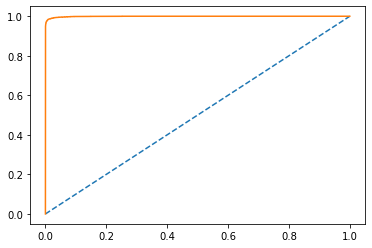

In [112]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [113]:
# Accuracy - Train Data
model.score(x_train, y_train)

0.9971277531758324

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


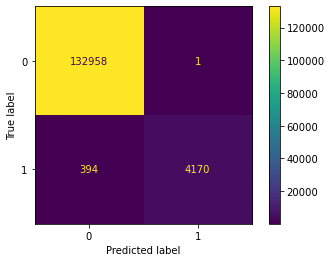

In [114]:
confusion_matrix(y_train, ytrain_predict)
plot_confusion_matrix(model,x_train,y_train);

In [115]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    132959
           1       1.00      0.91      0.95      4564

    accuracy                           1.00    137523
   macro avg       1.00      0.96      0.98    137523
weighted avg       1.00      1.00      1.00    137523



**AUC/ROC,Classification Report for Test data** 

AUC: 0.999


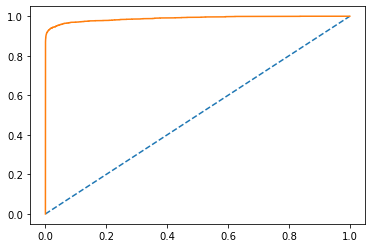

In [116]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [117]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.9954189925176877

In [118]:
confusion_matrix(y_test, ytest_predict)

array([[56969,    14],
       [  256,  1700]], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


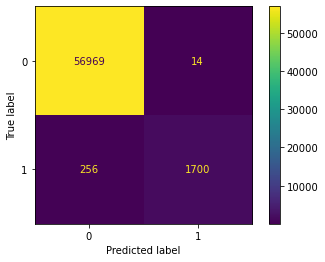

In [119]:
plot_confusion_matrix(model,x_test,y_test);

In [120]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56983
           1       0.99      0.87      0.93      1956

    accuracy                           1.00     58939
   macro avg       0.99      0.93      0.96     58939
weighted avg       1.00      1.00      1.00     58939



**Selected Model and Submission**

In [157]:
#final_model=CatBoostClassifier()
#final_model=XGBClassifier() 
final_model=RandomForestClassifier() 

In [158]:
final_model.fit(X,y)

C:\Users\User\AppData\Local\Temp\ipykernel_4628\3155372493.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X,y)


RandomForestClassifier()

In [159]:
df_test.shape

(28066, 14)

In [160]:
final_predictions = final_model.predict(df_test)
final_predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [145]:
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission

,id,Unnamed 0
0,RE-PROV-0000001,0
1,RE-PROV-0000002,0
2,RE-PROV-0000003,0
3,RE-PROV-0000004,0
4,RE-PROV-0000005,0
...,...,...
28061,RE-PROV-0028062,0
28062,RE-PROV-0028063,0
28063,RE-PROV-0028064,0
28064,RE-PROV-0028065,0


In [146]:
submission.rename(columns={"Unnamed 0": "prediction"},inplace=True)

In [147]:
submission.prediction.value_counts(normalize=True)

0    0.970427
1    0.029573
Name: prediction, dtype: float64

In [148]:
submission['prediction'] = submission['prediction'].astype('float64')

In [149]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28066 entries, 0 to 28065
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28066 non-null  object 
 1   prediction  28066 non-null  float64
dtypes: float64(1), object(1)
memory usage: 438.7+ KB


In [150]:
submission.to_csv('solution.csv',index = False)

**Submission for Probobality of Prediction**

In [161]:
final_predictions_prob = final_model.predict_proba(df_test) 
final_predictions_prob

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.14, 0.86]])

In [162]:
df_predict_prob = pd.DataFrame(final_predictions_prob, columns =['Prob-0','prediction'])
df_predict_prob

,Prob-0,prediction
0,1.00,0.00
1,1.00,0.00
2,0.99,0.01
3,1.00,0.00
4,1.00,0.00
...,...,...
28061,0.92,0.08
28062,0.97,0.03
28063,1.00,0.00
28064,0.96,0.04


In [163]:
#submit_prob=pd.DataFrame([test_file_ids,round(df_predict_prob['prediction'],2)]).T
submit_prob=pd.DataFrame([test_file_ids,df_predict_prob['prediction']]).T
submit_prob

,id,prediction
0,RE-PROV-0000001,0.0
1,RE-PROV-0000002,0.0
2,RE-PROV-0000003,0.01
3,RE-PROV-0000004,0.0
4,RE-PROV-0000005,0.0
...,...,...
28061,RE-PROV-0028062,0.08
28062,RE-PROV-0028063,0.03
28063,RE-PROV-0028064,0.0
28064,RE-PROV-0028065,0.04


In [164]:
submit_prob['prediction'] = submit_prob['prediction'].astype('float64')

In [165]:
submit_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28066 entries, 0 to 28065
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28066 non-null  object 
 1   prediction  28066 non-null  float64
dtypes: float64(1), object(1)
memory usage: 438.7+ KB


In [166]:
submit_prob.to_csv('solution.csv',index = False)